# Brent Oil Price: Bayesian Change Point Analysis

## Objective
Detect structural breaks in Brent oil prices and quantify the impact of major events using Bayesian inference.

In [1]:

import sys
print(sys.executable)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
import os
import pytensor

# Pre-emptive PyTensor configuration for Windows robustness
pytensor.config.gcc__cxxflags = "-DMS_WIN64"

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

c:\Users\ELITEBOOK\Documents\Projects\AI_engineering\Change Point Analysis and Statistical Modeling of Time Series Data\venv\Scripts\python.exe


In [2]:
# Diagnostic: show which Python the notebook is using and test pymc import
import sys, importlib
print('Notebook Python executable:', sys.executable)
try:
    import pymc as pm
    print('pymc imported:', pm.__version__)
except Exception as e:
    print('pymc import failed:', e)

Notebook Python executable: c:\Users\ELITEBOOK\Documents\Projects\AI_engineering\Change Point Analysis and Statistical Modeling of Time Series Data\venv\Scripts\python.exe
pymc imported: 5.25.1


## 1. Data Preparation and EDA

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_16220\75808656.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


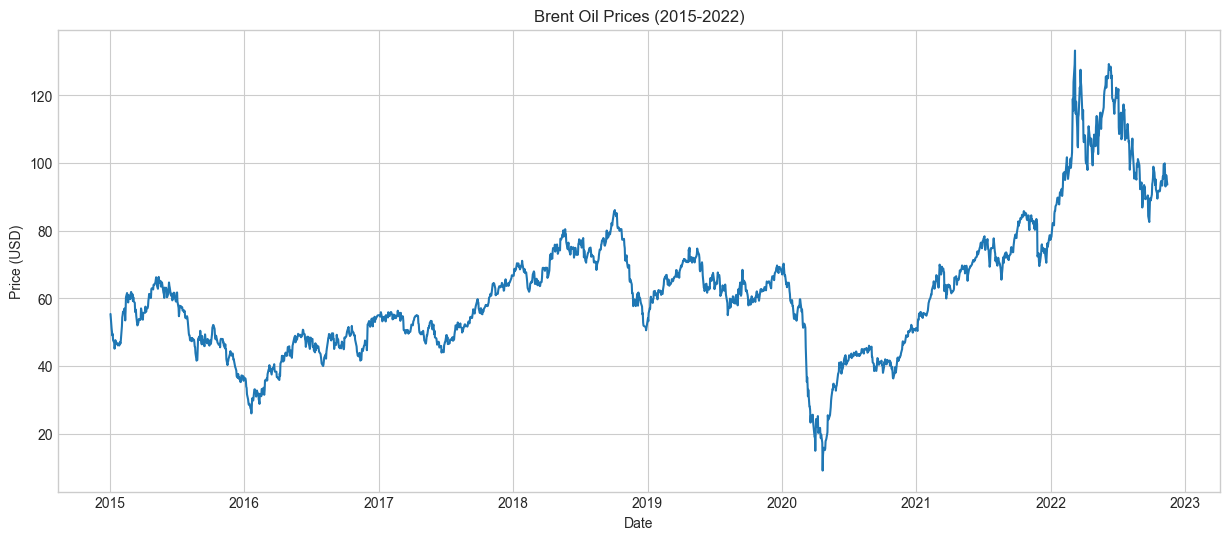

In [3]:
data_path = '../data/BrentOilPrices.csv'
df = pd.read_csv(data_path)
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df = df.sort_values('Date').reset_index(drop=True)

# Focus on a more recent period for clearer analysis (e.g., 2015 - 2022)
df_recent = df[df['Date'] >= '2015-01-01'].copy()

plt.figure(figsize=(15, 6))
plt.plot(df_recent['Date'], df_recent['Price'])
plt.title('Brent Oil Prices (2015-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

### Log Returns Analysis

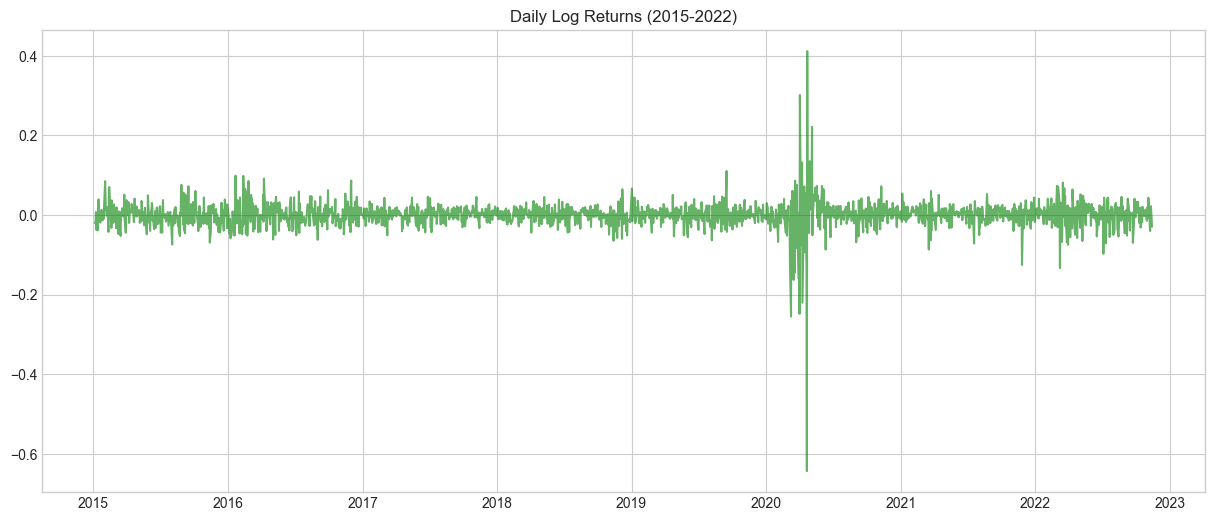

In [8]:
df_recent['Log_Returns'] = np.log(df_recent['Price']).diff()
df_recent = df_recent.dropna()

plt.figure(figsize=(15, 6))
plt.plot(df_recent['Date'], df_recent['Log_Returns'], color='green', alpha=0.6)
plt.title('Daily Log Returns (2015-2022)')
plt.show()

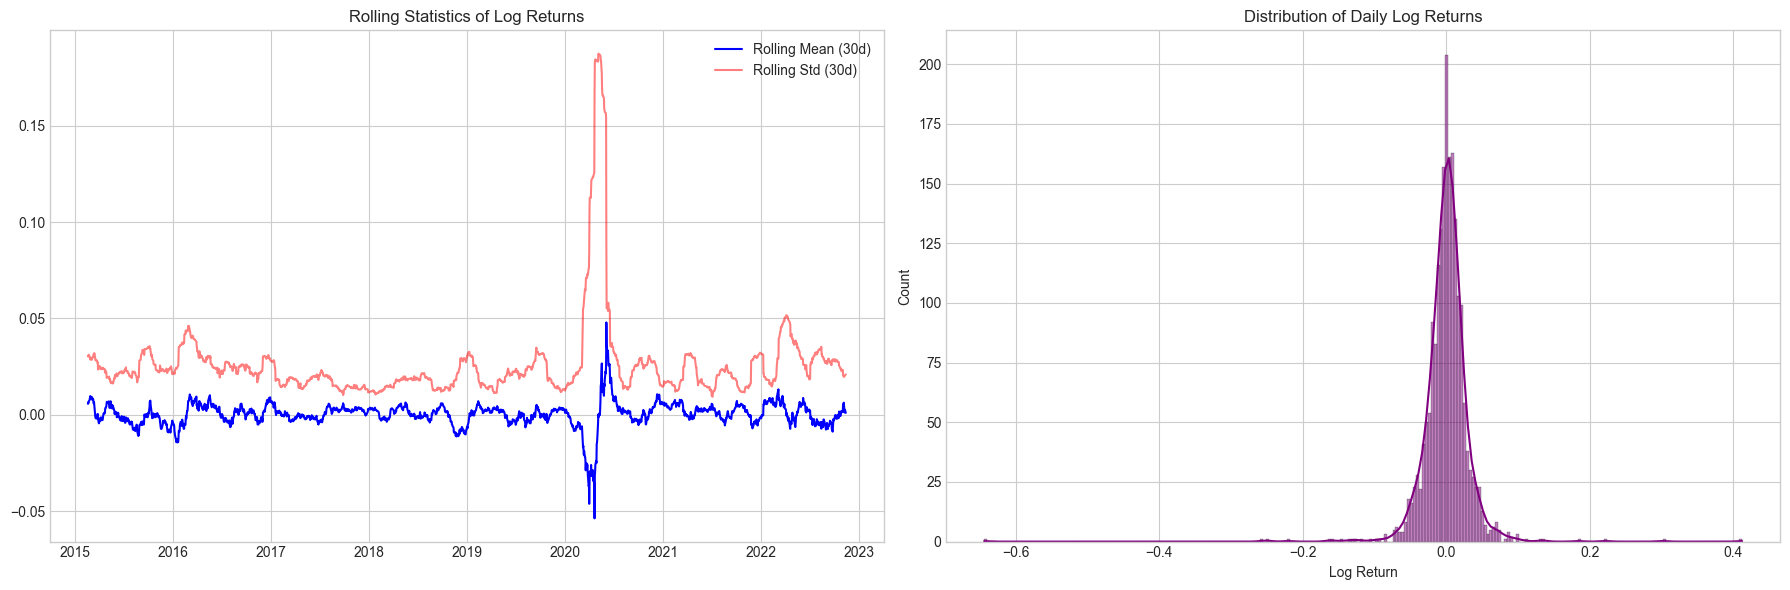

In [9]:
# Rolling statistics and distribution of log returns
window = 30
df_recent['Rolling_Mean'] = df_recent['Log_Returns'].rolling(window=window).mean()
df_recent['Rolling_Std'] = df_recent['Log_Returns'].rolling(window=window).std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Rolling stats plot
ax1.plot(df_recent['Date'], df_recent['Rolling_Mean'], label='Rolling Mean (30d)', color='blue')
ax1.plot(df_recent['Date'], df_recent['Rolling_Std'], label='Rolling Std (30d)', color='red', alpha=0.5)
ax1.set_title('Rolling Statistics of Log Returns')
ax1.legend()

# Distribution plot
sns.histplot(df_recent['Log_Returns'], kde=True, ax=ax2, color='purple')
ax2.set_title('Distribution of Daily Log Returns')
ax2.set_xlabel('Log Return')

plt.tight_layout()
plt.show()